In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [13]:
train_dir = "../dataset/train"
val_dir   = "../dataset/val"

print("Train dir exists:", os.path.exists(train_dir))
print("Val dir exists:", os.path.exists(val_dir))


Train dir exists: True
Val dir exists: True


In [14]:
datagen = ImageDataGenerator(rescale=1./255)


In [15]:
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 1096 images belonging to 5 classes.


In [16]:
val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 1096 images belonging to 5 classes.


In [17]:
print(train_data.class_indices)


{'normal': 0, 'vitamin_A': 1, 'vitamin_B': 2, 'vitamin_C': 3, 'vitamin_D': 4}


In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(5, activation='softmax')  # 5 classes
])


In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
35/35 [==============================] - 35s 964ms/step - loss: 1.5506 - accuracy: 0.4818 - val_loss: 0.9692 - val_accuracy: 0.6688
Epoch 2/10
35/35 [==============================] - 32s 906ms/step - loss: 1.0289 - accuracy: 0.6578 - val_loss: 0.7299 - val_accuracy: 0.7308
Epoch 3/10
35/35 [==============================] - 31s 901ms/step - loss: 0.7889 - accuracy: 0.7254 - val_loss: 0.7042 - val_accuracy: 0.7281
Epoch 4/10
35/35 [==============================] - 32s 904ms/step - loss: 0.6602 - accuracy: 0.7609 - val_loss: 0.4107 - val_accuracy: 0.8577
Epoch 5/10
35/35 [==============================] - 32s 903ms/step - loss: 0.5860 - accuracy: 0.7819 - val_loss: 0.3683 - val_accuracy: 0.8741
Epoch 6/10
35/35 [==============================] - 32s 914ms/step - loss: 0.4168 - accuracy: 0.8495 - val_loss: 0.2993 - val_accuracy: 0.9069
Epoch 7/10
35/35 [==============================] - 31s 897ms/step - loss: 0.4038 - accuracy: 0.8485 - val_loss: 0.2390 - val_accuracy: 0.9161

In [21]:
os.makedirs("../models", exist_ok=True)
model.save("../models/cnn_model.h5")
print("cnn_model.h5 saved successfully")


cnn_model.h5 saved successfully


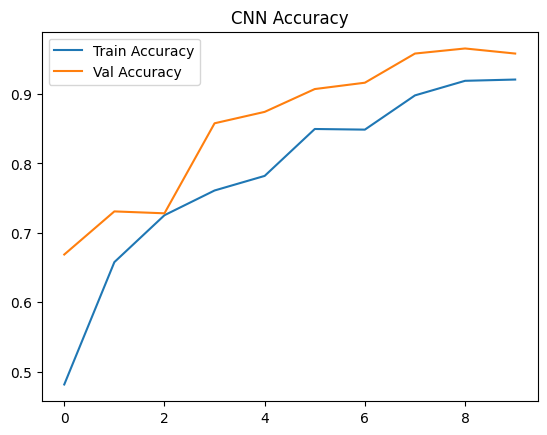

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("CNN Accuracy")
plt.show()
